# Problem statement: The goal here is to model the probability that a business goes bankrupt from different features.

In [55]:
import pandas as pd
from sklearn import preprocessing

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
#Loading the data
bankrupt = pd.read_csv("bankruptcy-prevention.csv",sep=';')
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [58]:
bankrupt[' class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name:  class, dtype: int64

In [59]:
bankrupt.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


EDA Part

In [60]:
#checking the data info
bankrupt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [61]:
#Finding the duplicates
bankrupt[bankrupt.duplicated()].shape  #Since this duplicated data is almost 60% of data, this cannot be deleted

(147, 7)

In [62]:
bankrupt.duplicated().sum()

147

In [63]:
#Checking column names for renaming requirement
bankrupt.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [64]:
#As column names contains spaces so removing spaces from the column names by renaming it
bankrupt.rename(columns={' management_risk':"management_risk"},inplace=True)
bankrupt.rename(columns={' financial_flexibility':"financial_flexibility"},inplace=True) 
bankrupt.rename(columns={' credibility':"credibility"},inplace=True)
bankrupt.rename(columns={' competitiveness':"competitiveness"},inplace=True)
bankrupt.rename(columns={' operating_risk':"operating_risk"},inplace=True)
bankrupt.rename(columns={' class':"Class"},inplace=True)


In [65]:
bankrupt #After renaming the column names

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,Class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [66]:
#Changing the data type - Converting the target variable into integer format from the object format
label_encoder = preprocessing.LabelEncoder()
bankrupt["Class"]=label_encoder.fit_transform(bankrupt.iloc[::,6:7:])

In [67]:
bankrupt #After changing the data type of target variable

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,Class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [68]:
#Data has no repeated or unnecessary columns so we are not dropping any columns

In [69]:
#Checking for the data types of each feature
bankrupt.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
Class                      int32
dtype: object

In [70]:
#Checking for the outliers using histogram as this is categorical data

Text(0.5, 1.0, 'Industrial risk')

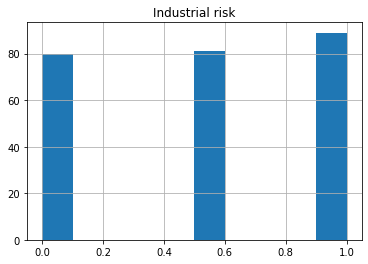

In [83]:
bankrupt.industrial_risk.hist()
plt.title('Industrial risk')
#Since it has no any data with very less frequency so it has no outliers

<AxesSubplot:>

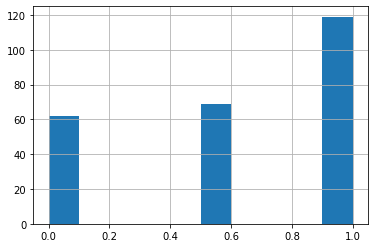

In [72]:
bankrupt.management_risk.hist() #Since it has no any data with very less frequency so it has no outliers

<AxesSubplot:>

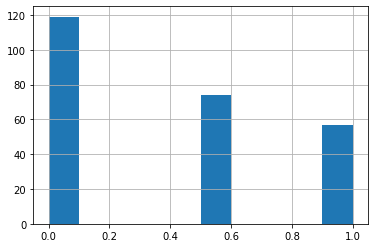

In [73]:
bankrupt.financial_flexibility.hist() #Since it has no any data with very less frequency so it has no outliers

<AxesSubplot:>

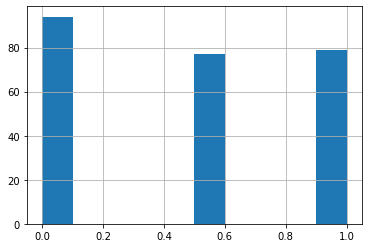

In [74]:
bankrupt.credibility.hist() #Since it has no any data with very less frequency so it has no outliers

<AxesSubplot:>

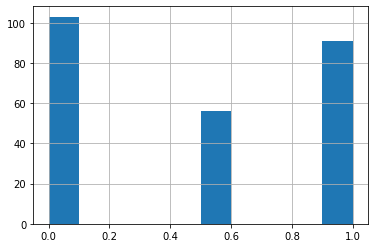

In [75]:
bankrupt.competitiveness.hist() #Since it has no any data with very less frequency so it has no outliers

<AxesSubplot:>

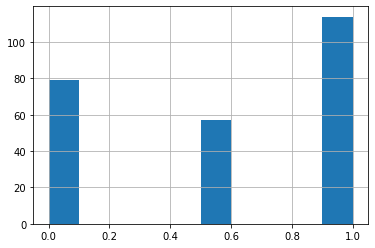

In [76]:
bankrupt.operating_risk.hist() #Since it has no any data with very less frequency so it has no outliers

In [77]:
#Checking for the missing values
bankrupt.isna().sum() #So data contains no missing values

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
Class                    0
dtype: int64

In [78]:
#Checking the correlation between features and target variable
bankrupt.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,Class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
Class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


In [79]:
#Since our data is in the range of 0 to 1 itself so feature scaling is not required and dummy variable are not required

In [80]:
import matplotlib.pyplot as plt

In [81]:
bankrupt.Class.value_counts()

1    143
0    107
Name: Class, dtype: int64

<Figure size 720x720 with 0 Axes>

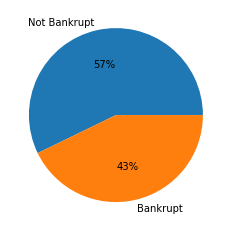

<Figure size 720x720 with 0 Axes>

In [82]:
plt.pie(bankrupt.Class.value_counts(),labels=['Not Bankrupt','Bankrupt'],autopct='%1.0f%%')
plt.figure(figsize=[10,10])

In [23]:
#Creating and saving the model
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import ppscore as pps
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
import pickle

data = pd.read_csv('bankruptcy-prevention.csv',sep=';')
data.head()

#As column names contains spaces so removing spaces from the column names by renaming it
data.rename(columns={' management_risk':"management_risk"},inplace=True)
data.rename(columns={' financial_flexibility':"financial_flexibility"},inplace=True) 
data.rename(columns={' credibility':"credibility"},inplace=True)
data.rename(columns={' competitiveness':"competitiveness"},inplace=True)
data.rename(columns={' operating_risk':"operating_risk"},inplace=True)
data.rename(columns={' class':"Class"},inplace=True)

#Changing the data type - Converting the target variable into integer format from the object format
label_encoder = preprocessing.LabelEncoder()
data["Class"]=label_encoder.fit_transform(data.iloc[::,6:7:])

#Forming new data by taking important features into consideration
new_data = data.drop(['industrial_risk','management_risk','operating_risk'],axis = 1)

#Splitting the data and forming the model
x = new_data.iloc[:,:-1].values
y = new_data.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3,random_state= 7)
log_model = LogisticRegression(max_iter=500,random_state = 7)
log_model.fit(X_train, Y_train)

# save the model to disk
pickle.dump(log_model, open('log_model.sav', 'wb'))


# load the model from disk
load_model = pickle.load(open('log_model.sav', 'rb'))
result = load_model.score(x, y)
print(result)

0.996


In [5]:
import pickle

In [6]:
pickle.dump

<function _pickle.dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)>

In [25]:
# -*- coding: utf-8 -*- Using model for prediction

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import ppscore as pps
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
import pickle
import streamlit as st 

st.title('Model Deployment: Bankrupt Model-LR')

   
df = pd.read_csv('bankruptcy-prevention.csv',sep=';')
df.rename(columns={' management_risk':"management_risk"},inplace=True)
df.rename(columns={' financial_flexibility':"financial_flexibility"},inplace=True) 
df.rename(columns={' credibility':"credibility"},inplace=True)
df.rename(columns={' competitiveness':"competitiveness"},inplace=True)
df.rename(columns={' operating_risk':"operating_risk"},inplace=True)
df.rename(columns={' class':"Class"},inplace=True)

#Changing the data type - Converting the target variable into integer format from the object format
label_encoder = preprocessing.LabelEncoder()
df["Class"]=label_encoder.fit_transform(df.iloc[::,6:7:])

df2 = df.drop(['industrial_risk','management_risk','operating_risk'],axis = 1)
st.subheader('User Input parameters')
st.write(df)


# load the model from disk
load_model = pickle.load(open('log_model.sav', 'rb'))

prediction = load_model.predict(df2.iloc[::,0:3:])
prediction_proba = load_model.predict_proba(df2.iloc[::,0:3])

#st.subheader('Predicted Result')
#st.write('Yes' if prediction_proba[0][1] > 0.5 else 'No')

st.subheader('Prediction Probability')
st.write(prediction_proba)

output=pd.concat([df2,pd.DataFrame(prediction_proba)],axis=1)

output.to_csv('output.csv')